# Main

In [87]:
'''Main Libraries'''
import numpy as np
import pandas as pd

'''Datetime'''
import time
from datetime import datetime
from dateutil.parser import parse

'''Modeling'''
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score

'''Visualization'''
import matplotlib.pyplot as plt

## Uplaod data 
Converting from json to pandas dataframe

In [88]:
data = pd.read_json (r'song.json')

### Data Preview

In [89]:
data.head()

,id,user_id,user_state,user_sign_up_date,song_played,time_played
0,GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19
2,DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29
3,HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10
4,SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00


In [90]:
data.describe()

,user_id
count,4000.000000
mean,101.574000
std,58.766835
min,1.000000
25%,48.000000
50%,102.000000
75%,155.000000
max,200.000000


In [91]:
data['user_id'].unique()

array([122,   3,  35, 126,   6, 147, 155, 171, 174, 170, 110, 185, 137,
       121,  77,  79,  58, 130,  11,  99, 150, 114,  97, 159,  85,  31,
        18, 188, 138, 182,  42, 175, 115, 165, 162, 184,  34,  46,  72,
       124, 193, 127, 181,  86,  32, 140, 194,  90,  51,  19, 158, 195,
        52,  23,  41, 163,  98,  22,  60,  94, 112,  70, 199, 192,  96,
        45,  53,  14,  76,  91, 169,  47,  65,  25,  56,  54,  13,  15,
       125,  49, 144, 107,   5, 116, 156, 120, 176, 106, 179, 141, 117,
       173, 189,  30, 111,  75,  55,  64,  69, 131, 160, 146, 196, 164,
        62,  20, 183, 148, 108, 178,  95, 102,  87, 153,  33, 132,   7,
        57,  27,   2, 172, 119,  80,   9, 143,  12,  89, 167,  68, 100,
        88, 135, 123, 151, 161,  78,  16,  10, 200,   4,  73,  40,  37,
       166, 198,  29, 190,   1,  92, 134, 105, 136,  39, 145,  43,  17,
        26, 180,  81,  44,  67, 113, 152,  38,  24,  84,  82,  71, 157,
       186, 118, 101, 104,  66,  74, 109, 197, 177, 128,  36, 14

## Date-time formatting

In [92]:
data['user_sign_up_date'] =  pd.to_datetime(data['user_sign_up_date'])
data['time_played'] = pd.to_datetime(data['time_played'])
data['day_played'] = pd.to_datetime(data['time_played'].apply(lambda x: str(x).split()[0]))
data['time_of_day_played'] = data['time_played'].apply(lambda x: str(x).split(' ')[1])
data.head()

,id,user_id,user_state,user_sign_up_date,song_played,time_played,day_played,time_of_day_played
0,GOQMMKSQQH,122,Louisiana,2015-05-16,Hey Jude,2015-06-11 21:51:35,2015-06-11,21:51:35
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19,2015-06-06,16:49:19
2,DKQSXVNJDH,35,New Jersey,2015-05-04,Back In the U.S.S.R.,2015-06-14 02:11:29,2015-06-14,02:11:29
3,HLHRIDQTUW,126,Illinois,2015-05-16,P.s. I Love You,2015-06-08 12:26:10,2015-06-08,12:26:10
4,SUKJCSBCYW,6,New Jersey,2015-05-01,Sgt. Pepper's Lonely Hearts Club Band,2015-06-28 14:57:00,2015-06-28,14:57:00


# What are the top 3 and the bottom 3 states in terms number of users?

In [93]:
x = data.groupby(['user_state'])['user_id'].agg({'users_per_state': lambda x: len(x.unique()),
                                                'total_acitivity_per_state': lambda x: len(x)})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [94]:
print('States with the most number of users')
print('-------------------------------------')
print(x['users_per_state'].nlargest(3))
print('States with the most number of users')
print('-------------------------------------')
print(x['users_per_state'].nsmallest(3))

States with the most number of users
-------------------------------------
user_state
New York      23
California    21
Texas         15
Name: users_per_state, dtype: int64
States with the most number of users
-------------------------------------
user_state
Arizona        1
Connecticut    1
Idaho          1
Name: users_per_state, dtype: int64


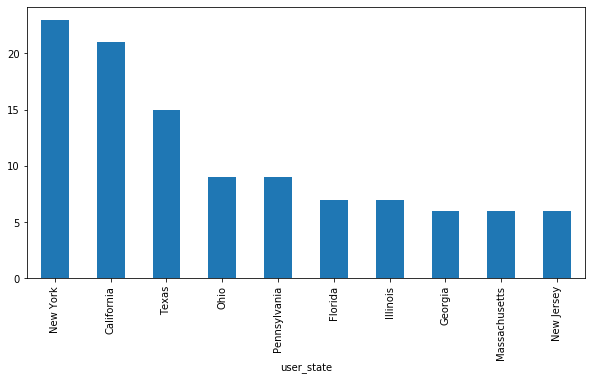

In [95]:
x['users_per_state'].nlargest(10).plot.bar(figsize = (10,5))

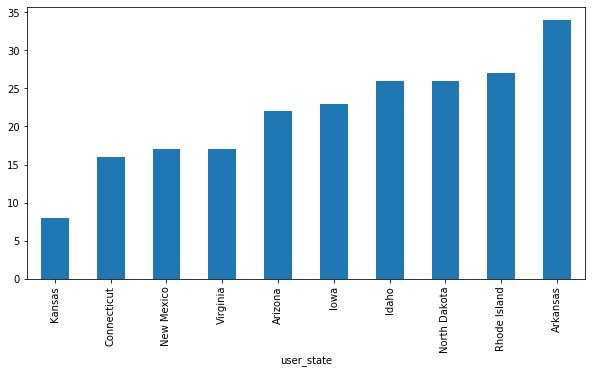

In [96]:
data.groupby(['user_state'])['user_id'].count().sort_values().nsmallest(10).plot.bar(figsize = (10,5))

# What are the top 3 and the bottom 3 states in terms of user engagement? You can choose how to mathematically define user engagement. What the CEO cares about here is in which states users are using the product a lot/very little.

In [97]:
x['total_acitivity_per_state'].nlargest(3)

user_state
New York      469
California    425
Texas         230
Name: total_acitivity_per_state, dtype: int64

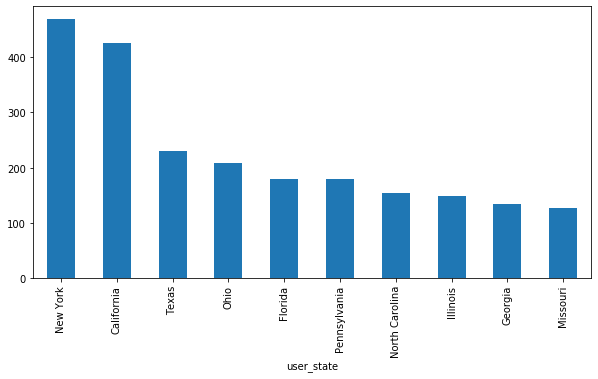

In [98]:
x['total_acitivity_per_state'].nlargest(10).plot.bar(figsize = (10,5))

In [99]:
x['total_acitivity_per_state'].nsmallest(3)

user_state
Kansas          8
Connecticut    16
New Mexico     17
Name: total_acitivity_per_state, dtype: int64

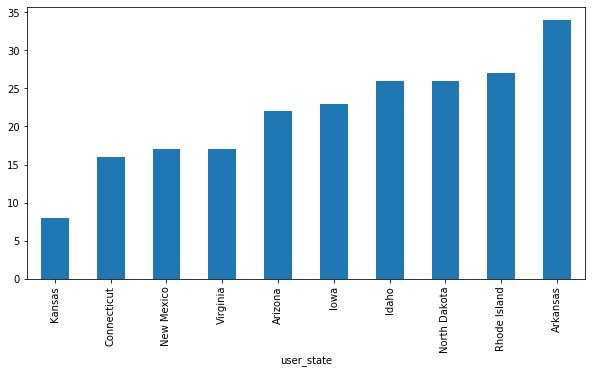

In [100]:
x['total_acitivity_per_state'].nsmallest(10).plot.bar(figsize = (10,5))

# The CEO wants to send a gift to the first user who signed-up for each state. That is, the first user who signed-up from California, from Oregon, etc. Can you give him a list of those users?

In [101]:
df = data.groupby(['user_state'])['user_sign_up_date'].min()
ids = {}
for i in data['user_state'].unique():
    df1 = data[data['user_state'] == i]
    df2 = df1[df1['user_sign_up_date'] == df[i]]['user_id'].iloc[0]
    ids[i] = df2
print('First user for each state')
ids

First user for each state


{'Louisiana': 50,
 'Ohio': 3,
 'New Jersey': 6,
 'Illinois': 45,
 'Texas': 7,
 'Rhode Island': 174,
 'Oregon': 1,
 'California': 39,
 'New York': 19,
 'Wisconsin': 32,
 'Tennessee': 70,
 'Maryland': 18,
 'Michigan': 13,
 'Pennsylvania': 11,
 'Missouri': 85,
 'Alabama': 5,
 'Oklahoma': 119,
 'Washington': 125,
 'Idaho': 165,
 'Kentucky': 34,
 'Arkansas': 78,
 'Connecticut': 127,
 'Colorado': 173,
 'Georgia': 20,
 'Utah': 29,
 'North Carolina': 2,
 'Alaska': 106,
 'Mississippi': 23,
 'Florida': 41,
 'West Virginia': 60,
 'South Carolina': 64,
 'Massachusetts': 15,
 'Virginia': 142,
 'Indiana': 102,
 'Iowa': 178,
 'Minnesota': 8,
 'North Dakota': 135,
 'New Mexico': 4,
 'Nebraska': 134,
 'Arizona': 105,
 'Kansas': 177}

# Build a function that takes as an input any of the songs in the data and returns the most likely song to be listened next.
That is, if, for instance, a user is currently listening to “Eight Days A Week“, which song has the highest probability of being played right after it by the same user? This is going to be V1 of a song recommendation model.

## Feature Engineering 

### Number of times song played by each user

In [102]:
data['song_played_times'] = data.groupby(['song_played','user_id'])['day_played'].transform('count')

### Number of times song played by all users overall

In [103]:
data['song_played_times_overall_day'] = data.groupby(['song_played'])['day_played'].transform('count')

### Number of times song played by each state

In [104]:
data['song_played_times_loc'] = data.groupby(['user_state'])['song_played'].transform('count')

### Order in which the song was played by each user by day

In [105]:
data['dummy'] = 1
data['song_played_order'] = data.sort_values(by = 'time_played').groupby(['user_id','day_played'])['dummy'].transform('cumsum').apply(lambda x: x)

In [106]:
data.drop('dummy', axis = 1, inplace = True)
data[data['user_id'] == 3].sort_values(by = 'time_played').head()

,id,user_id,user_state,user_sign_up_date,song_played,time_played,day_played,time_of_day_played,song_played_times,song_played_times_overall_day,song_played_times_loc,song_played_order
3669,TGATMXQGDZ,3,Ohio,2015-05-01,A Day In The Life,2015-06-01 19:18:04,2015-06-01,19:18:04,1,189,209,1
1245,NJSUBWRMQQ,3,Ohio,2015-05-01,Get Back,2015-06-01 20:31:49,2015-06-01,20:31:49,3,279,209,2
179,PBXOQQBWEA,3,Ohio,2015-05-01,Lucy In The Sky With Diamonds,2015-06-04 01:08:14,2015-06-04,01:08:14,2,113,209,1
3862,RKKESLRFSH,3,Ohio,2015-05-01,Hello Goodbye,2015-06-06 14:43:29,2015-06-06,14:43:29,1,161,209,1
1,HWKKBQKNWI,3,Ohio,2015-05-01,We Can Work It Out,2015-06-06 16:49:19,2015-06-06,16:49:19,1,99,209,2


In [110]:
data[['user_state', 'id','song_played','song_played_times',
      'song_played_times_overall_day','song_played_times_loc','song_played_order']].head()

,user_state,id,song_played,song_played_times,song_played_times_overall_day,song_played_times_loc,song_played_order
0,Louisiana,GOQMMKSQQH,Hey Jude,1,120,105,1
1,Ohio,HWKKBQKNWI,We Can Work It Out,1,99,209,2
2,New Jersey,DKQSXVNJDH,Back In the U.S.S.R.,2,163,117,1
3,Illinois,HLHRIDQTUW,P.s. I Love You,1,6,149,1
4,New Jersey,SUKJCSBCYW,Sgt. Pepper's Lonely Hearts Club Band,1,8,117,1


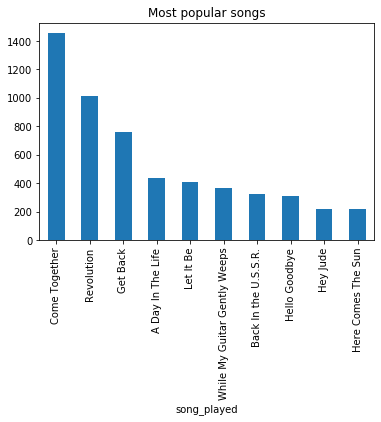

In [114]:
# top songs
x = data.groupby(['song_played'])['song_played_times'].sum().nlargest(10).plot.bar(title = 'Most popular songs')

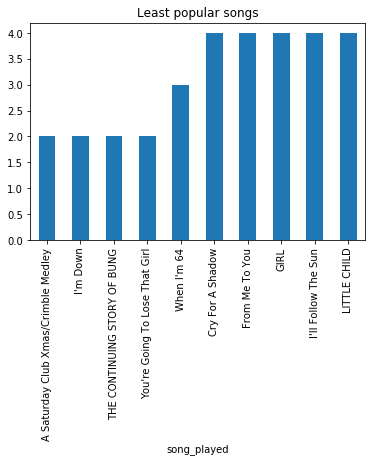

In [115]:
# top songs
x = data.groupby(['song_played'])['song_played_times'].sum().nsmallest(10).plot.bar(title = 'Least popular songs')

In [15]:
data['time_of_day_played'] = pd.to_datetime(data['time_of_day_played'])
data['time_of_day_played'] = data['time_of_day_played'].dt.hour*3600 + data['time_of_day_played'].dt.minute*60 + data['time_of_day_played'].dt.second

### difference between sign up day and first played

In [17]:
data['first_played'] = data.groupby('user_id')['day_played'].transform('min')
data['sign_up_to_first_played'] = (data['first_played'] - data['day_played']).astype(int)

## Model

In [18]:
df = data.drop(['user_sign_up_date','time_played',
                'day_played','song_played','first_played','id'], axis = 1)
le = preprocessing.LabelEncoder()
y = data['song_played']
le.fit(y)
y = le.transform(y)

### Training

In [19]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df), 
                                                    y, random_state=42, test_size = 0.33)
rfc =  AdaBoostClassifier(n_estimators=100, random_state=42,
                         base_estimator = DecisionTreeClassifier(max_depth = 10))
rfc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

### Predicting

In [20]:
y_pred = rfc.predict(X_test)

In [21]:
rfc.score(X_test, y_test)

0.8333333333333334

### Score
How would you set up a test to check whether your model works well?

In [22]:
f1_score(y_test, y_pred, average='weighted')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.8308758084166559